# **EXPLORATORY DATA ANALYSIS - Retail**


### Objective:

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can 
work to make more profit. 

● What all business problems you can derive by exploring the data? 

## **Author: Pranshu Dhingra**

----------------------------------------------------------------

In [100]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [101]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [102]:
data.shape

(9994, 13)

In [103]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [104]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [105]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [106]:
data.isnull().sum()   

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [107]:
# checking the duplicate rows in the dataset

data.duplicated().sum()

17

In [108]:
# removing the duplicated rows

data.drop_duplicates(inplace = True)

In [109]:
data.shape

(9977, 13)

In [110]:
# Now, let us drop the unwanted features

data['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

Since we have only 1 country, that is, United States, under consideration, we can surely drop it. We can also drop the Postal Code feature since it will not provide any significant results in our study. We already have the features  'State', 'City', and 'Region' that will provide us some significant results.

In [111]:
dataset=data.copy()
dataset.drop(['Country','Postal Code'],inplace=True, axis=1)
dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


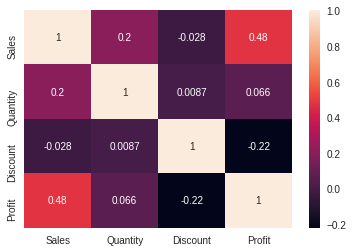

In [112]:
# Let us check the correlations, if any, between the set of variables.

fig1=dataset.corr()
sns.heatmap(fig1,annot=True)


**Interpretations:**

The positively related variables are:

1.) Sales and Profit (moderately correlated)

3.) Sales and Quantity (weakly correlated)

4.) Quantity and Profit (moderately correlated)

The negatively related variables are:

1.) Discount and Profit (moderately correlated)

There is almost negligible relationship between sales and discount, quantity and profit, quantity and discount.

### **For 'Sales':**

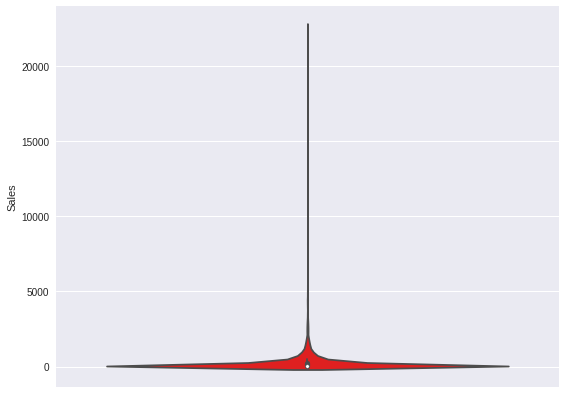

In [113]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = dataset["Sales"],showmedians=True,color='red' )

### **For 'Profit':**

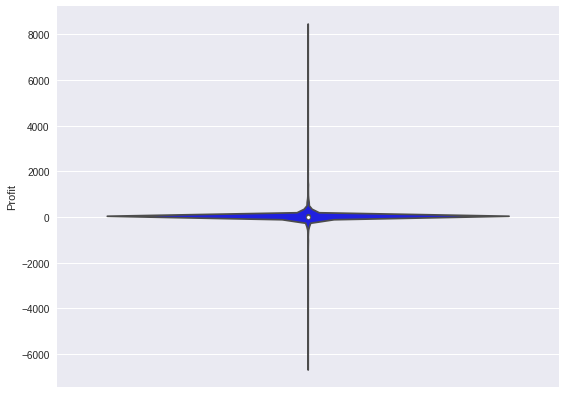

In [114]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = dataset["Profit"],showmedians=True,color='blue' )

### **For 'Quantity':**

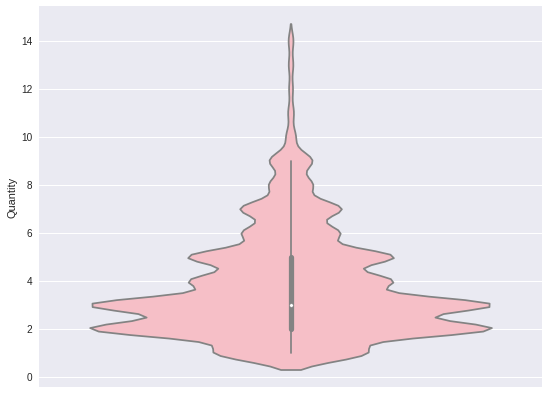

In [115]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = dataset["Quantity"],showmedians=True,color='lightpink' )

Most of the quantities seem to be in the range 0 to 5.5.
Considering just this range and popping out the rest of the data, we will have the most significant data with us.

### **For 'Discount':**

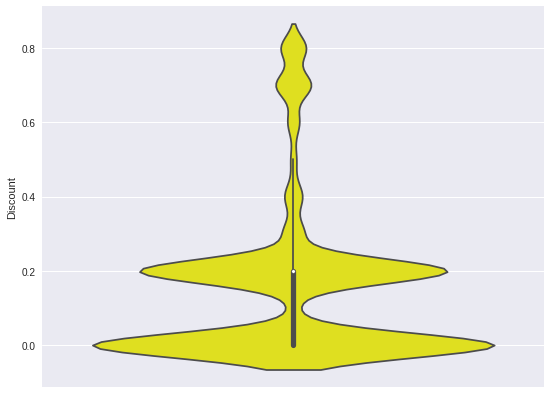

In [116]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = dataset["Discount"],showmedians=True,color='yellow' )

This is an interesting plot since we can see it is bimodal.

The two wider sections of this plot shows the discount utilized with a high probability rate. The range till 0.2 seems to be the most significant. 

Thus, considering the range upto 0.3, we will pop out the rest.

Now, since we have all the quantitative parameters without any outliers, we can observe the correlations between the features pair-wise.

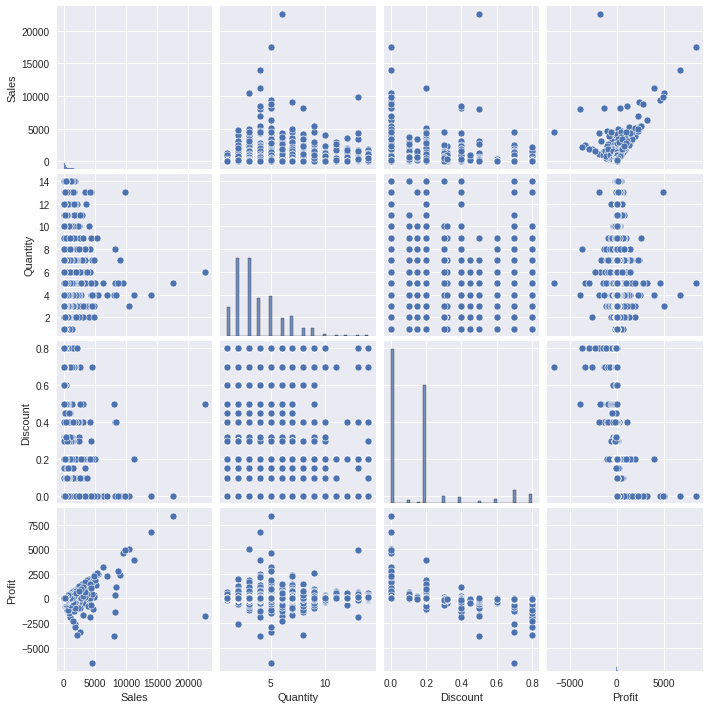

In [117]:
sns.pairplot(dataset)

In [118]:
dataset.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [119]:
dataset['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [120]:
dataset['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [121]:
dataset['City'].nunique()

531

In [122]:
dataset['State'].nunique()

49

In [123]:
dataset['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [124]:
dataset['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [125]:
dataset['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Let us analyze our first factor 'Ship Mode'.

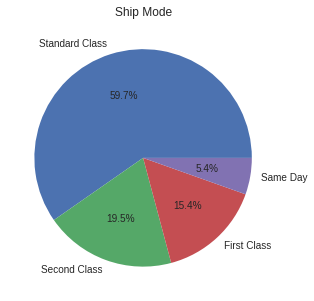

In [126]:
plt.figure(figsize = (5,5))
plt.title('Ship Mode')
plt.pie(dataset['Ship Mode'].value_counts(), labels=dataset['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

This pie-chart shows the share of each shipment mode and the mode most preferred.

Let us see the impact of each mode on the 'Quantity', 'Sales', 'Profit' and 'Discount'.

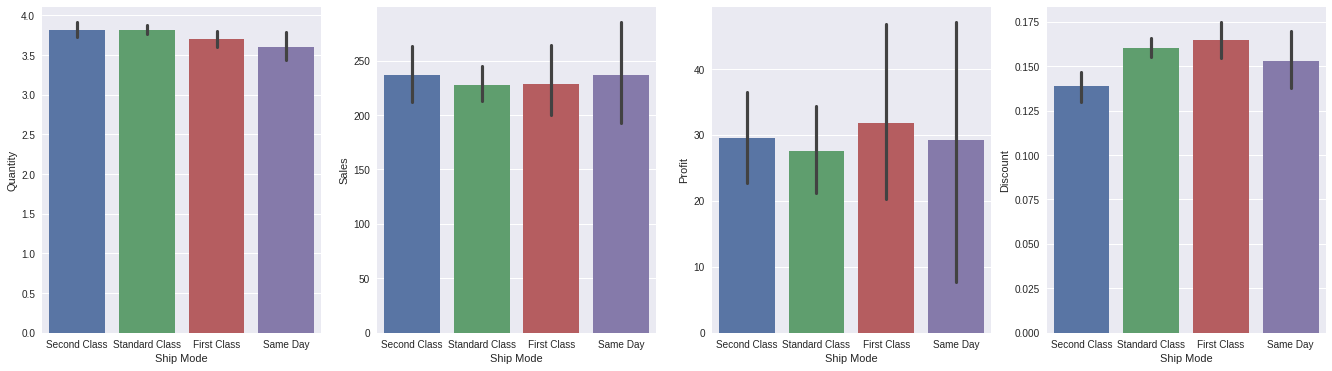

In [127]:
fig,ax=plt.subplots(1,4,figsize=(23,6))
sns.barplot(x='Ship Mode', y='Quantity', data = dataset,ax=ax[0])
sns.barplot(x='Ship Mode', y='Sales', data = dataset,ax=ax[1])
sns.barplot(x='Ship Mode', y='Profit', data = dataset,ax=ax[2])
sns.barplot(x='Ship Mode', y='Discount', data = dataset,ax=ax[3])

Second Factor: Segment

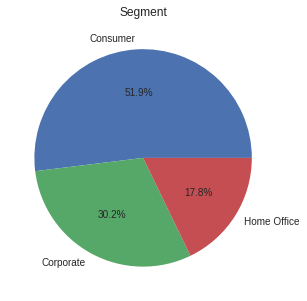

In [128]:
plt.figure(figsize = (5,5))
plt.title('Segment')
plt.pie(dataset['Segment'].value_counts(), labels=dataset['Segment'].value_counts().index,autopct='%1.1f%%')
plt.show()

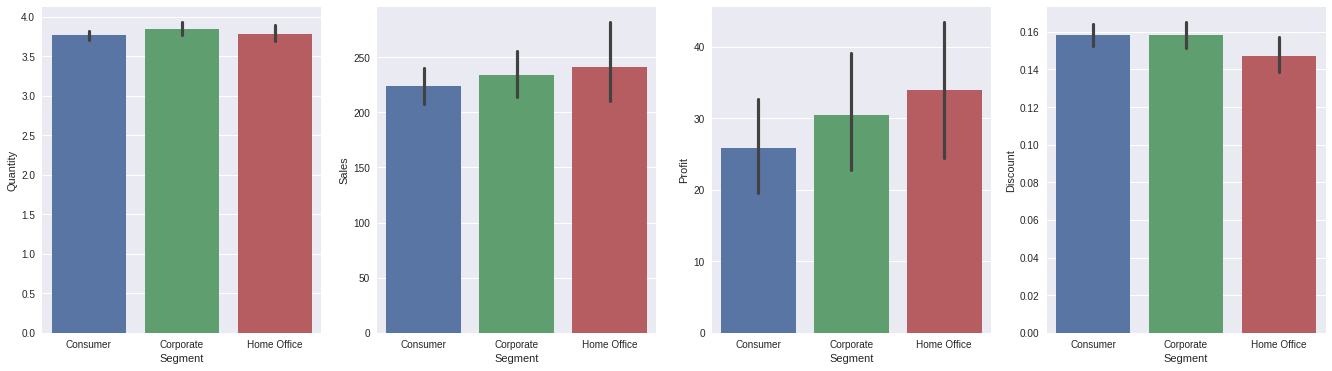

In [129]:
fig,ax=plt.subplots(1,4,figsize=(23,6))
sns.barplot(x='Segment', y='Quantity', data = dataset,ax=ax[0])
sns.barplot(x='Segment', y='Sales', data = dataset,ax=ax[1])
sns.barplot(x='Segment', y='Profit', data = dataset,ax=ax[2])
sns.barplot(x='Segment', y='Discount', data = dataset,ax=ax[3])

Third Factor: Region

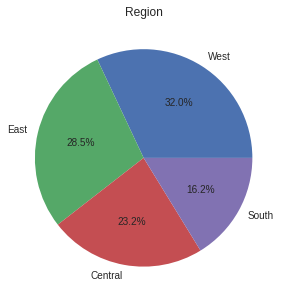

In [130]:
plt.figure(figsize = (5,5))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

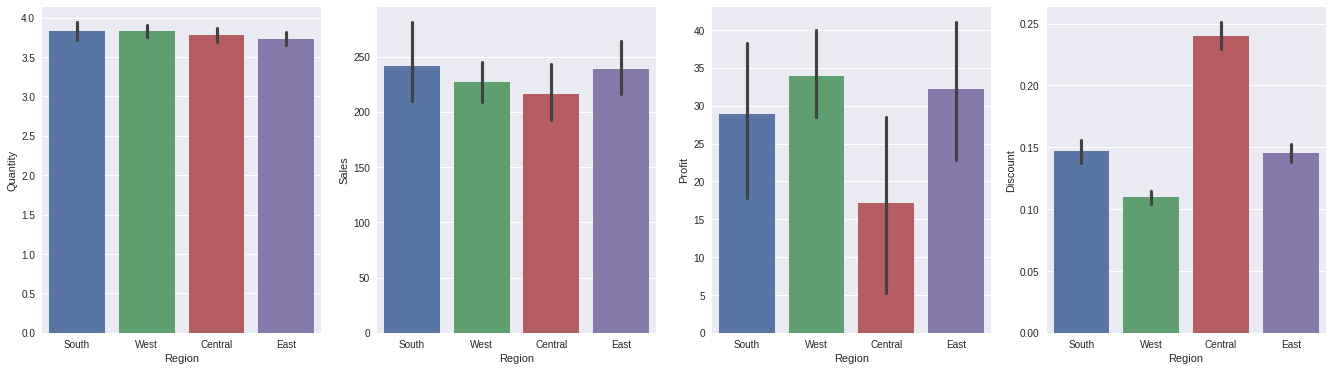

In [131]:
fig,ax=plt.subplots(1,4,figsize=(23,6))
sns.barplot(x='Region', y='Quantity', data = dataset,ax=ax[0])
sns.barplot(x='Region', y='Sales', data = dataset,ax=ax[1])
sns.barplot(x='Region', y='Profit', data = dataset,ax=ax[2])
sns.barplot(x='Region', y='Discount', data = dataset,ax=ax[3])

Fourth Factor: Category

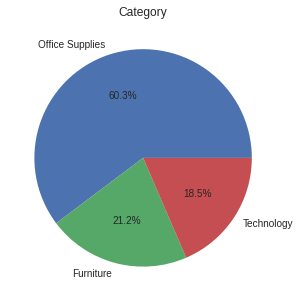

In [132]:
plt.figure(figsize = (5,5))
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

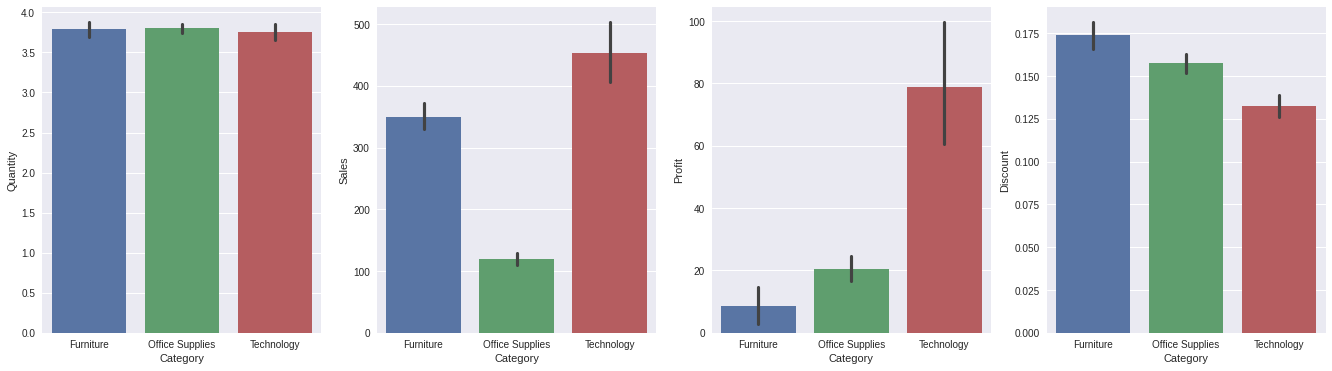

In [133]:
fig,ax=plt.subplots(1,4,figsize=(23,6))
sns.barplot(x='Category', y='Quantity', data = dataset,ax=ax[0])
sns.barplot(x='Category', y='Sales', data = dataset,ax=ax[1])
sns.barplot(x='Category', y='Profit', data = dataset,ax=ax[2])
sns.barplot(x='Category', y='Discount', data = dataset,ax=ax[3])

Fifth Factor: Sub-Category

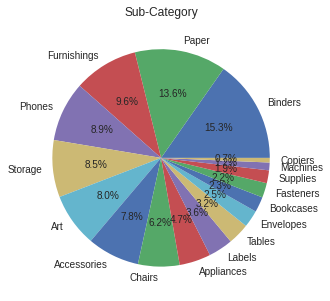

In [134]:
plt.figure(figsize = (5,5))
plt.title('Sub-Category')
plt.pie(dataset['Sub-Category'].value_counts(), labels=dataset['Sub-Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

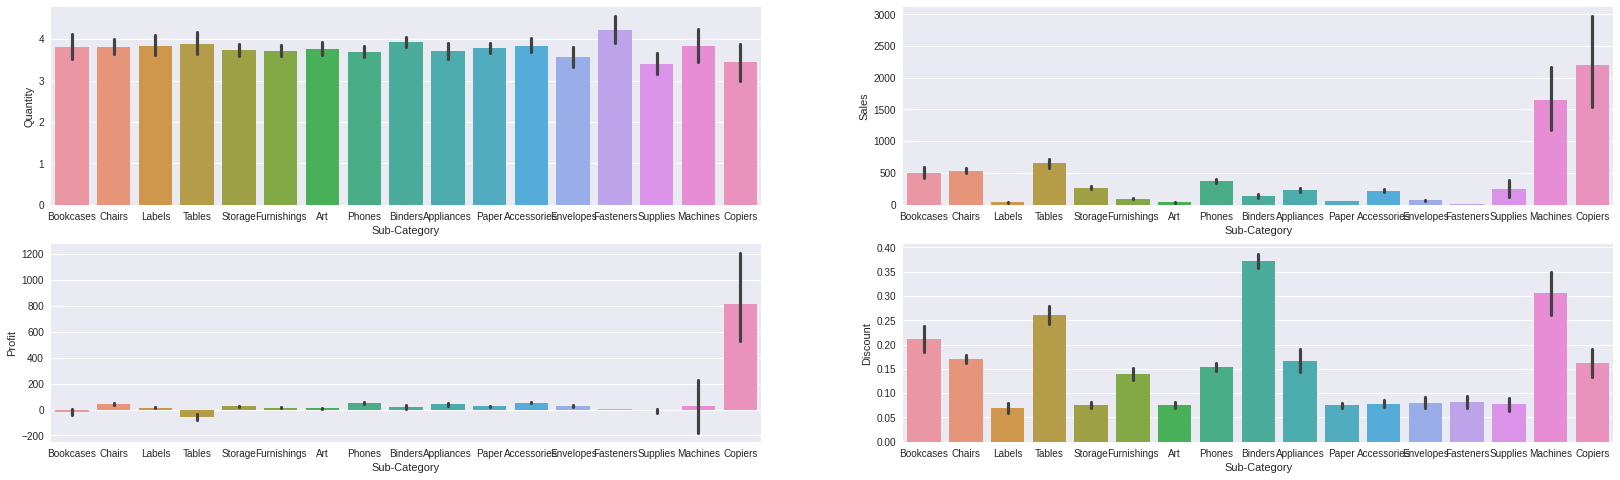

In [135]:
fig,ax=plt.subplots(2,2,figsize=(28,8))
sns.barplot(x='Sub-Category', y='Quantity', data = dataset,ax=ax[0][0])
sns.barplot(x='Sub-Category', y='Sales', data = dataset,ax=ax[0][1])
sns.barplot(x='Sub-Category', y='Profit', data = dataset,ax=ax[1][0])
sns.barplot(x='Sub-Category', y='Discount', data = dataset,ax=ax[1][1])

Sixth Factor: State-Wise

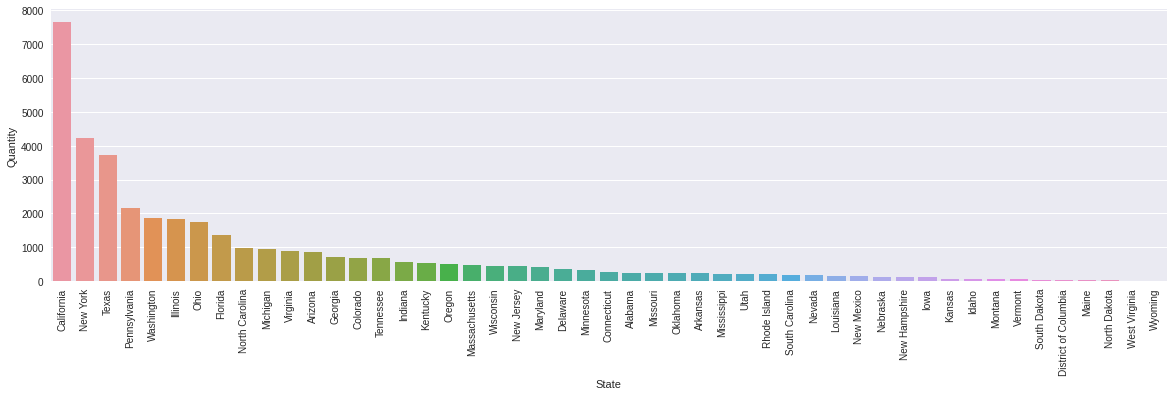

In [136]:
data_state= dataset.groupby(['State'])[['Quantity']].sum().sort_values("Quantity", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Quantity', data = data_state)
plt.show()

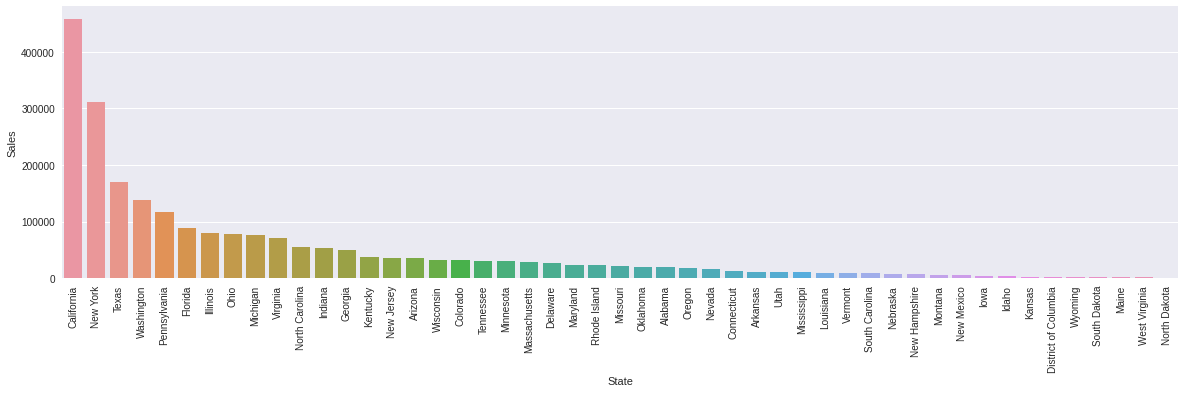

In [137]:
data_state= dataset.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

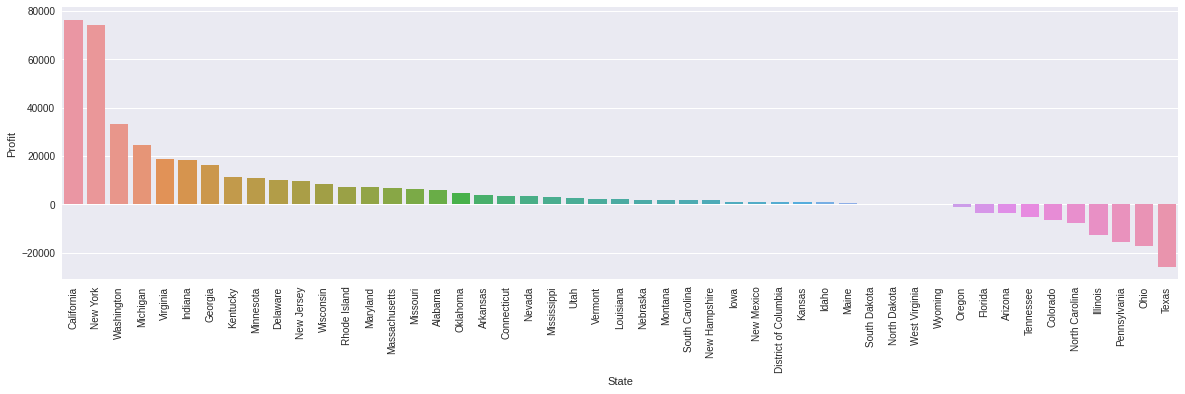

In [138]:
data_state= dataset.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

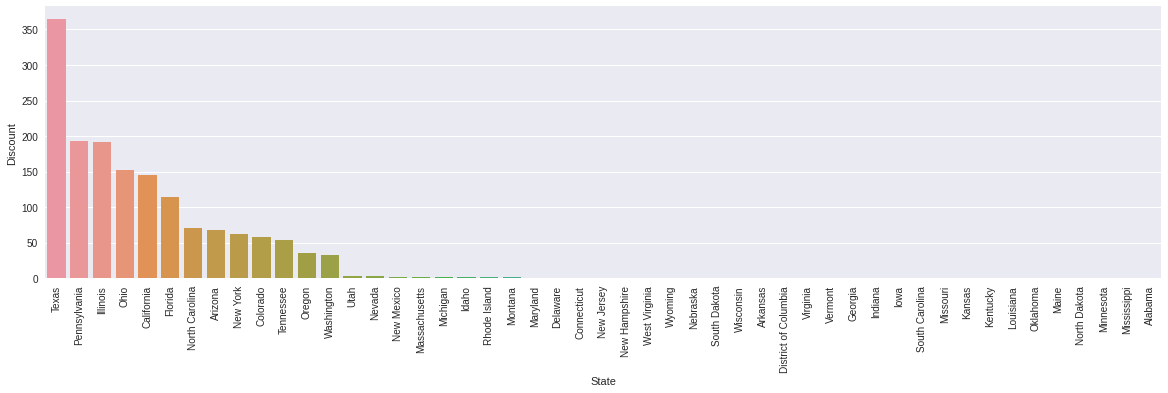

In [139]:
data_state= dataset.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Discount', data = data_state)
plt.show()

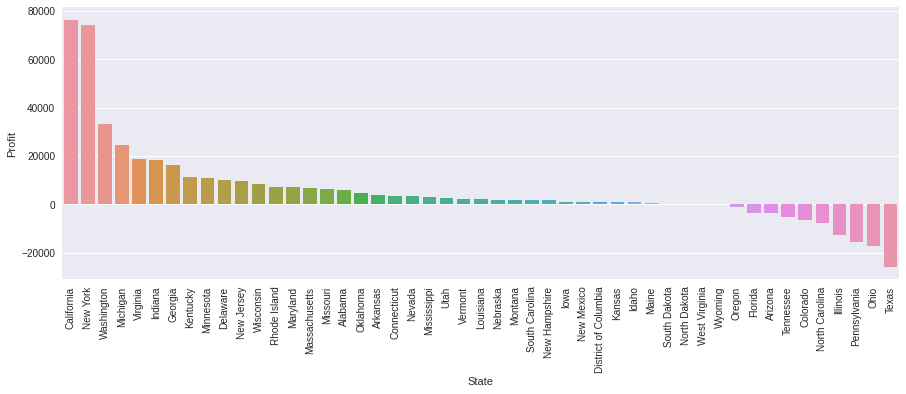

In [140]:
# checking the negative profits in the original dataset since profits matter for each datapoint

data_state= dataset.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

Let's construct a pairplot.

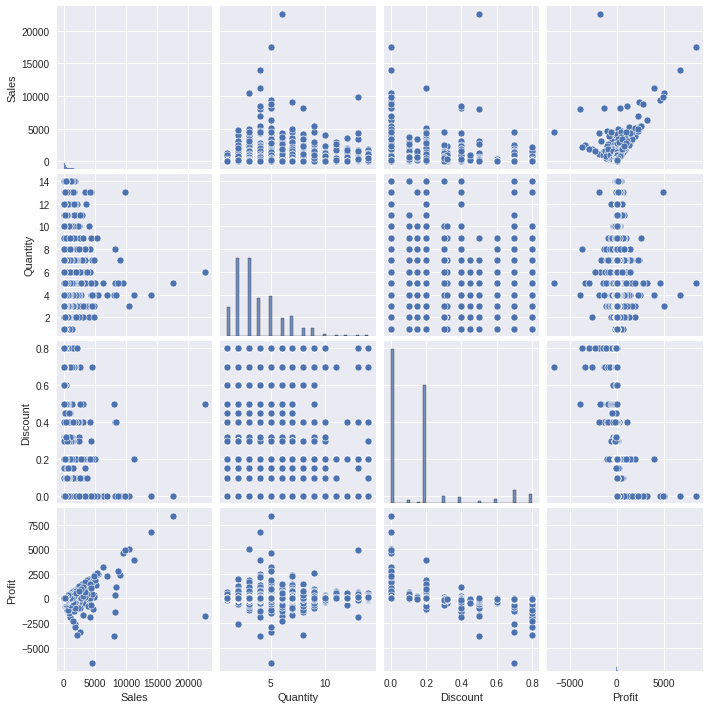

In [141]:
g=sns.pairplot(dataset[['Sales', 'Quantity', 'Discount', 'Profit']])
g.fig.set_size_inches(10,10)

By this pairplot, we can see the existing correlation between various quantitative factors.

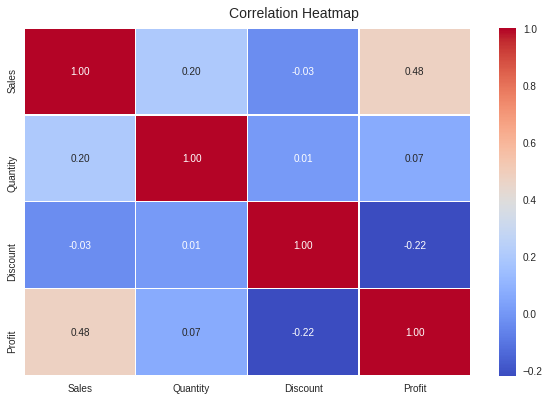

In [142]:
corr_matrix=dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(corr_matrix,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

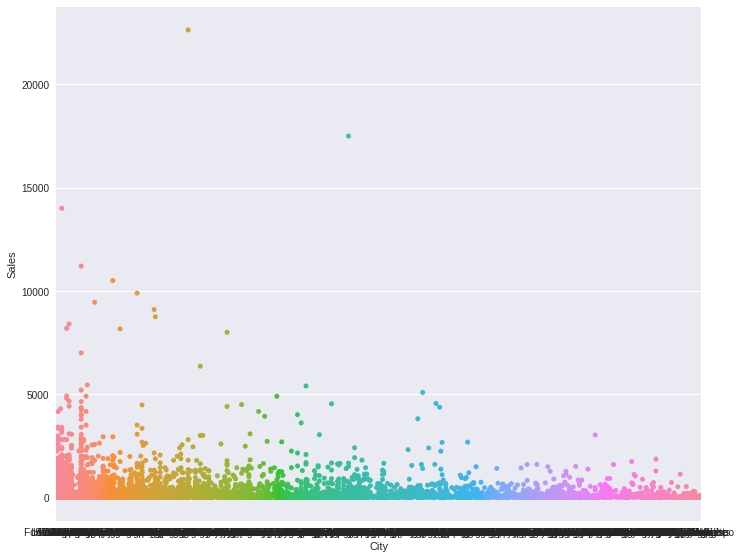

In [143]:
g=sns.catplot(x="City", y="Sales", jitter=False, data=dataset,legend='True')
g.fig.set_size_inches(12,8)

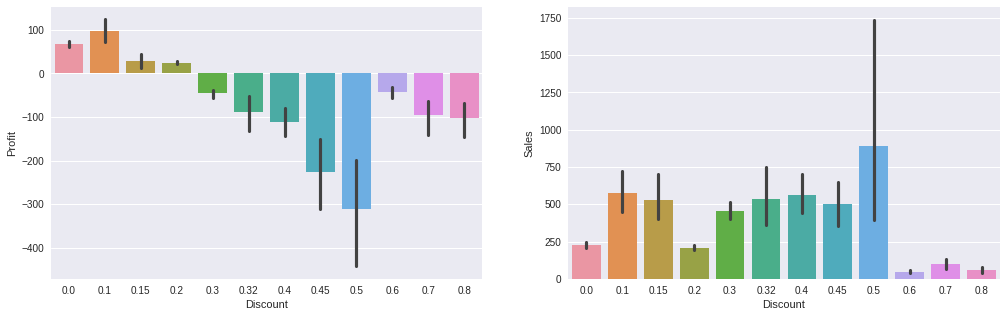

In [144]:
# effect of discount on profit and sales

fig,ax=plt.subplots(1,2,figsize=(17,5))

sns.barplot(x='Discount', y='Profit', data = dataset,ax=ax[0])
sns.barplot(x='Discount', y='Sales', data = dataset,ax=ax[1])

 In the first graph, increase in discount does not show a specific trend in the decrease in profit although we can see that a discount of approximately more than 0.2 leads to decresae in profit with a maximum decrease in profit for a discount of 0.5

In the second graph, we can see that a discount of more than 0.5 does not increase sales as such so it must be avoided.
The maximum sales is observed for a discount of 0.5 following the maximum loss/minimum profit.


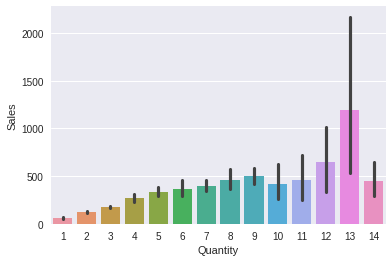

In [145]:
# effect of quantity on sales

sns.barplot(x='Quantity', y='Sales', data = dataset)

An increase in the quantity shows a linear incresae in the sales until the quantity of 13.

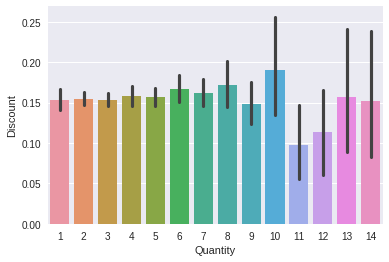

In [146]:
# effect of quantity on discount

sns.barplot(x='Quantity', y='Discount', data = dataset)

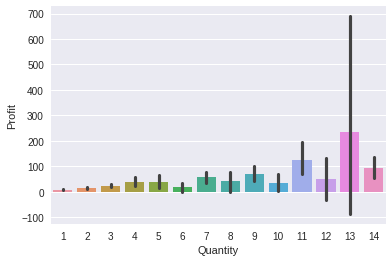

In [147]:
# effect of quantity on profit

sns.barplot(x='Quantity', y='Profit', data = dataset)

The quantity of 13 provides the highest sales and hence the highest profits because the discount is comparatively low for a quantity of 13 as compared to the other quantities.

Text(0.5, 0, 'Discount')

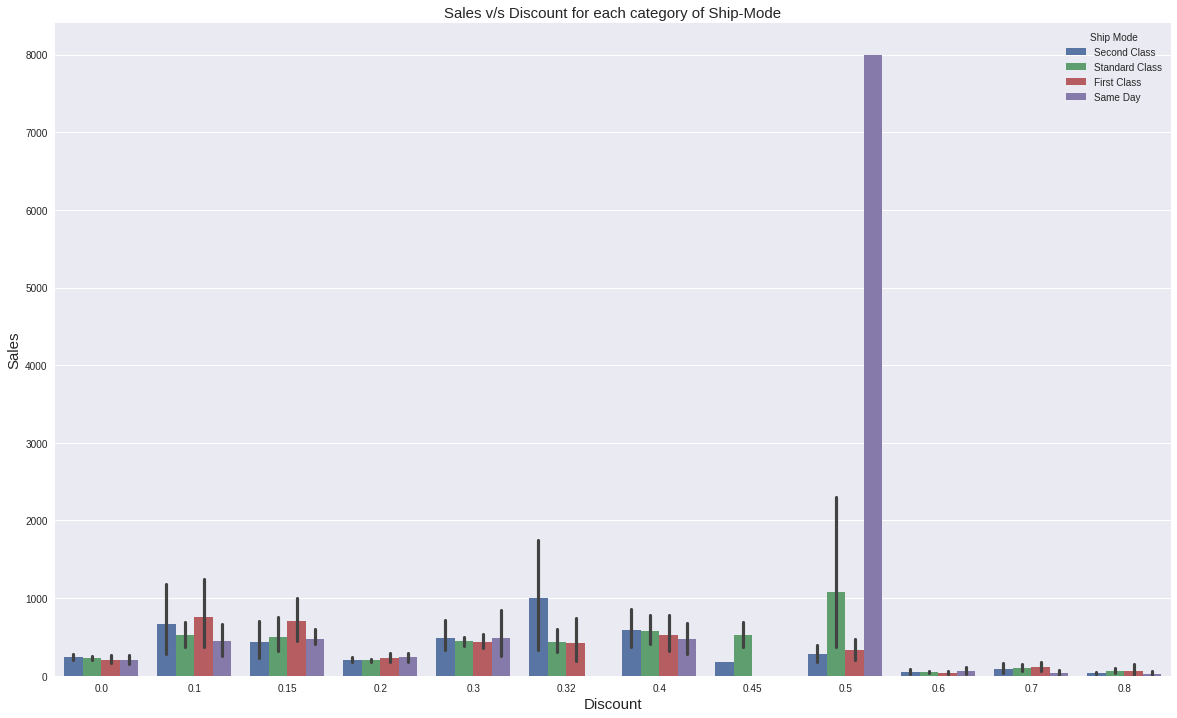

In [148]:
# Sales v/s Discount for each category of Ship-Mode

fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Discount", y="Sales", hue="Ship Mode",ax=ax,data=dataset)
plt.title('Sales v/s Discount for each category of Ship-Mode',size=15)
plt.ylabel('Sales',size=15)
plt.xlabel('Discount',size=15)

It shows that the maximum sales is for the discount of 0.5 when the ship mode is done for the same day.

Text(0.5, 0, 'Discount')

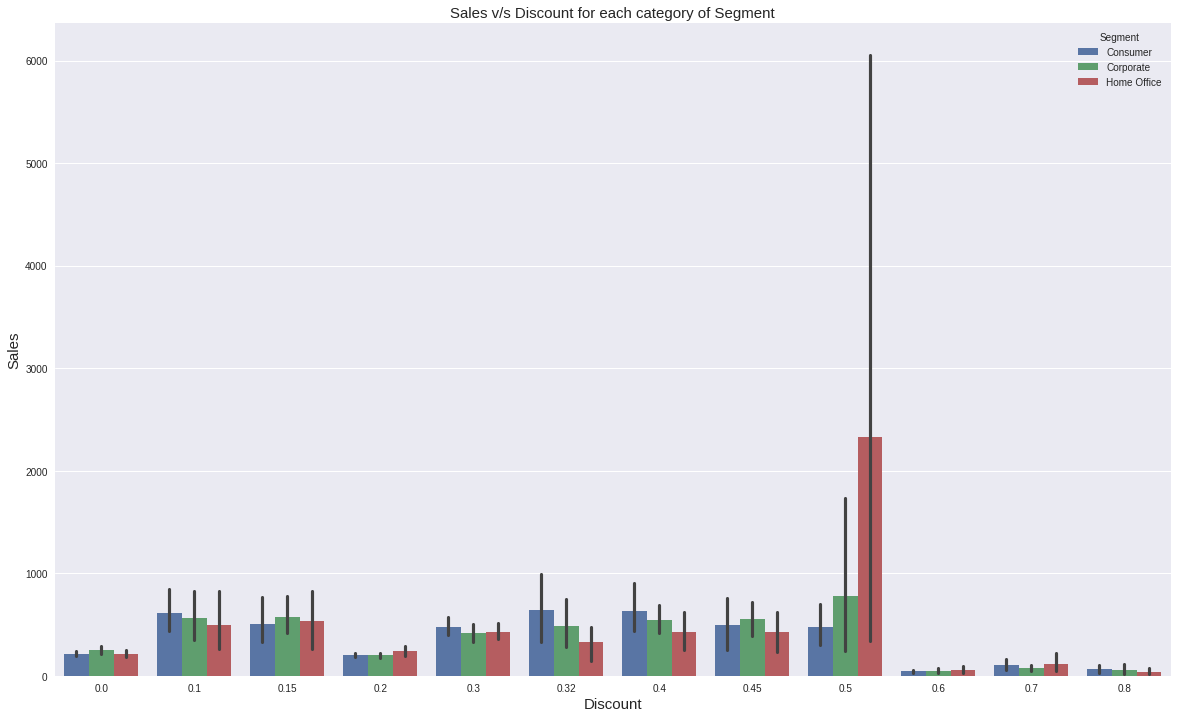

In [149]:
#Sales v/s Discount for each category of Segment

fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Discount", y="Sales", hue="Segment",ax=ax,data=dataset)
plt.title('Sales v/s Discount for each category of Segment',size=15)
plt.ylabel('Sales',size=15)
plt.xlabel('Discount',size=15)

The maximum sales occur for the discount of 0.5 for the home office products.

Text(0.5, 0, 'Discount')

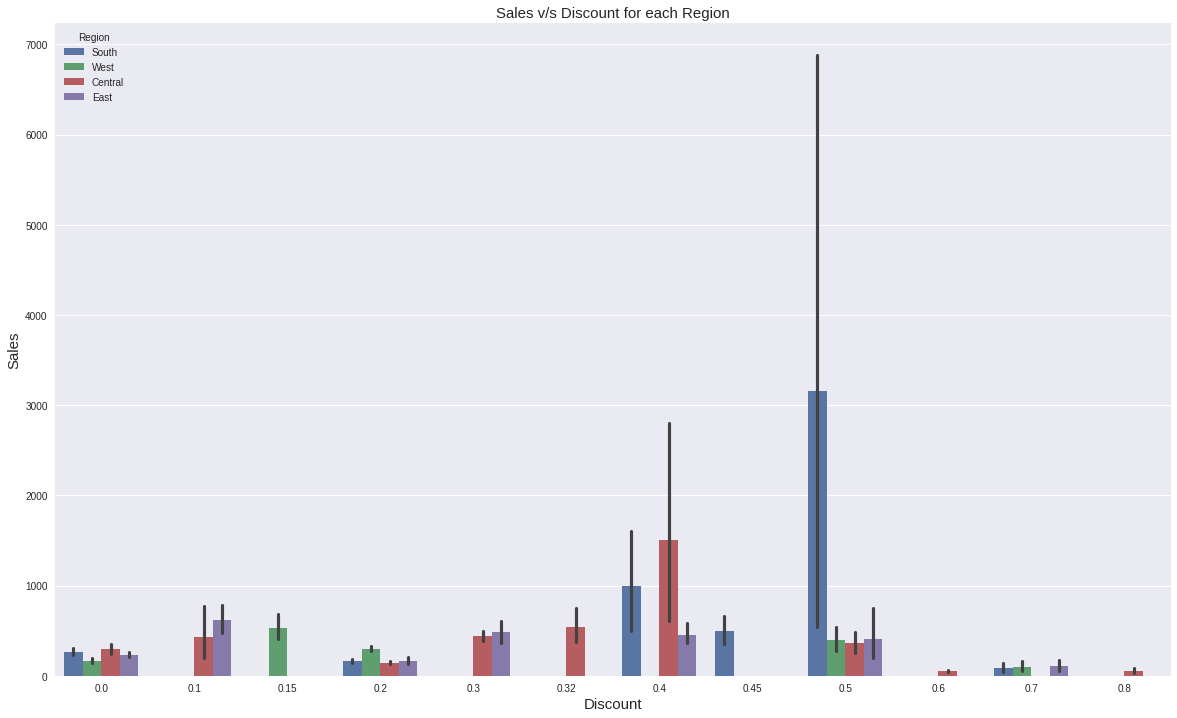

In [150]:
# Sales v/s Discount for each Region

fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Discount", y="Sales", hue="Region",ax=ax,data=dataset)
plt.title('Sales v/s Discount for each Region',size=15)
plt.ylabel('Sales',size=15)
plt.xlabel('Discount',size=15)

The maximum sales occur for a discount of 0.5 in the southern region.

Text(0.5, 0, 'Discount')

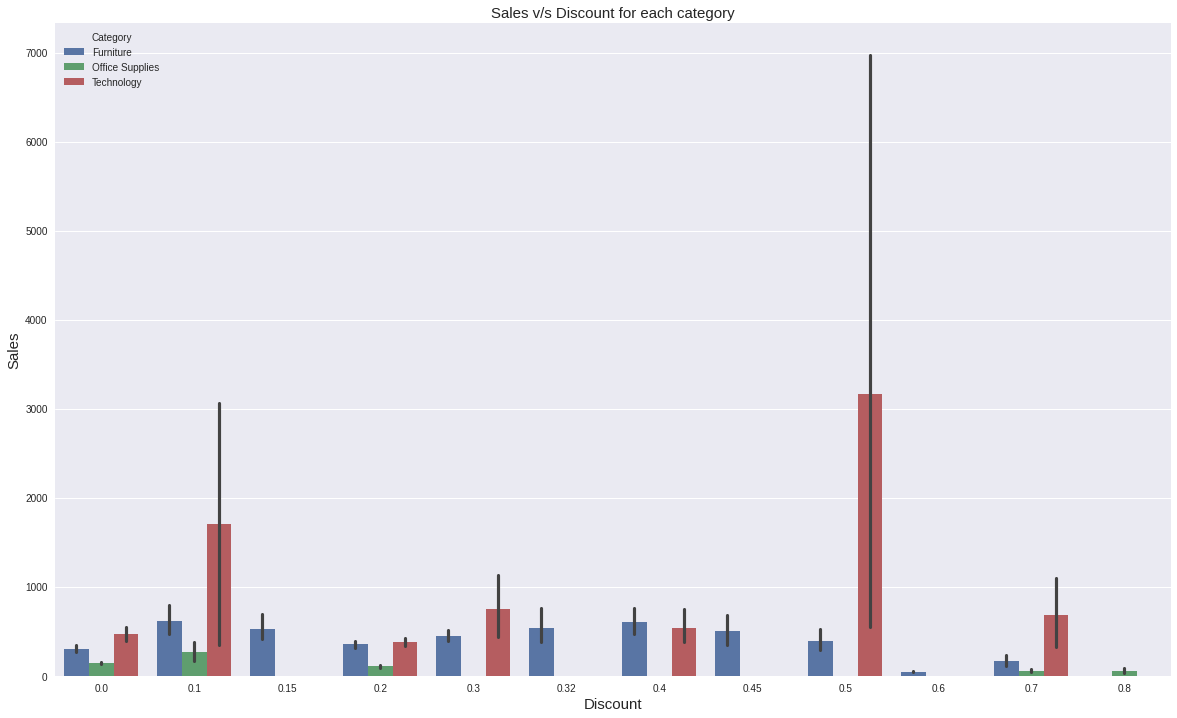

In [151]:
# Sales v/s Discount for each category

fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Discount", y="Sales", hue="Category",ax=ax,data=dataset)
plt.title('Sales v/s Discount for each category',size=15)
plt.ylabel('Sales',size=15)
plt.xlabel('Discount',size=15)

The maximum sales occur for a discount of 0.5 in the technology sector.

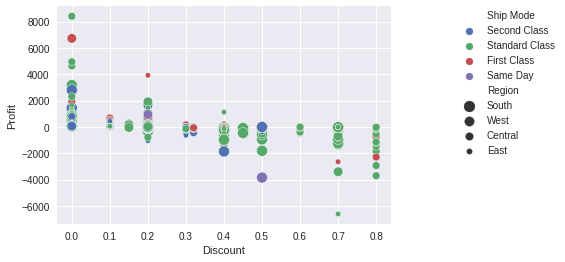

In [152]:
sns.scatterplot(x='Discount', y='Profit',hue='Ship Mode', size="Region", sizes=(30, 120),data=dataset)
plt.legend(bbox_to_anchor=(1.5, 1),
           borderaxespad=0)

There is a significant loss for the 'standard class' ship mode at a discount of 0.4 and more since the sales is low due to less number of buyers in mostly the east and the central region.



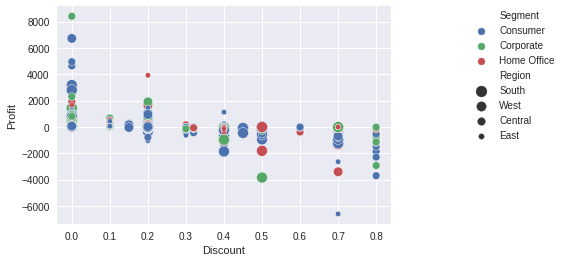

In [153]:
sns.scatterplot(x='Discount', y='Profit',hue='Segment',size="Region", sizes=(30, 120), data=dataset)
plt.legend(bbox_to_anchor=(1.5, 1),
           borderaxespad=0)

Low profit of consumer products in mostly the east and central region due to high discounts. High discounts have been provided because the sales is low but anyway, it is leading to higher losses since sales is not increasing. 

Low profit of corporate products for a discount of 0.4 and 0.5 in the central and west region and for a discount of 0.8 in the eastern region. 


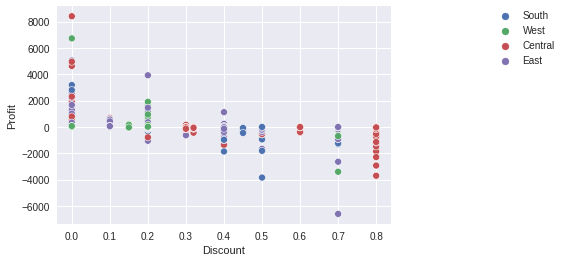

In [154]:
sns.scatterplot(x='Discount', y='Profit',hue='Region', data=dataset)
plt.legend(bbox_to_anchor=(1.5, 1),
           borderaxespad=0)

In Central Region, the sales is high for a discount up to 0.4 after which the sales decline sharply and hence the profit.

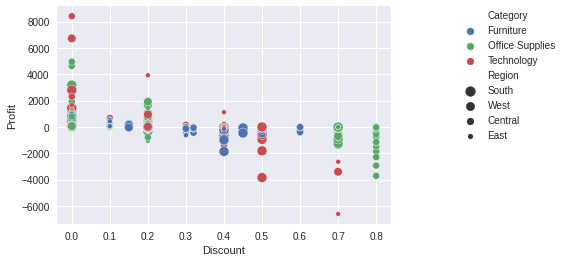

In [155]:
sns.scatterplot(x='Discount', y='Profit',hue='Category', size="Region", data=dataset)
plt.legend(bbox_to_anchor=(1.5, 1),
           borderaxespad=0)

For Office supplies:

For the Central region, the sales is high only uptil a discount of 0.4 after which it sharply declines. In this case the profit will also be high for a discount of 0.4 or less as seen in the graph.

For the West region, the sales is not high and is very irregular. So, inspite of giving higher discounts, the sales is not increasing accordingly leading to low profits.

Interpretations for the furniture and technology can b emade in the same way.


No handles with labels found to put in legend.


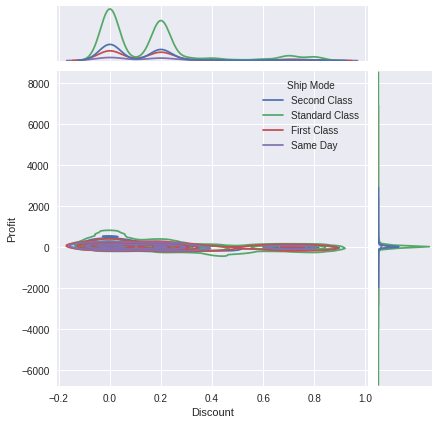

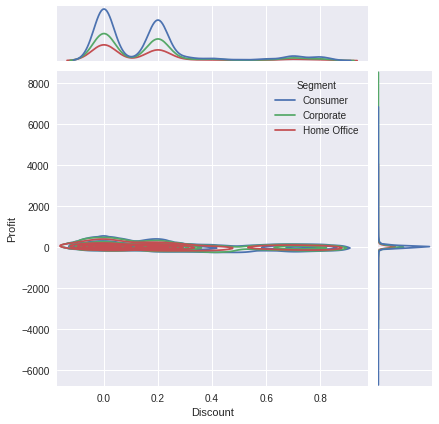

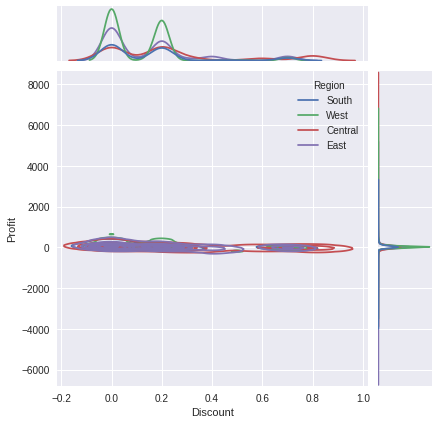

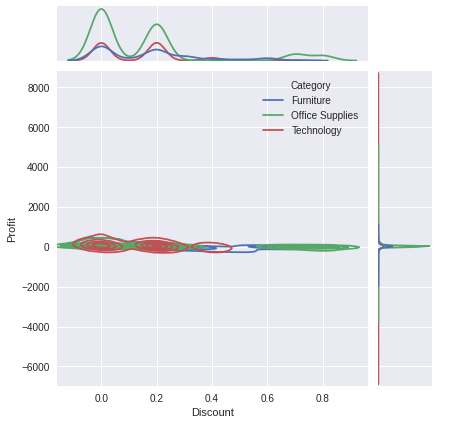

In [156]:
# joint plots to show the concentration of profit based on the discount for subparts of each part in the columns of the dataset

sns.jointplot(data=dataset, x="Discount", y="Profit", hue="Ship Mode", kind="kde",ax=ax)
sns.jointplot(data=dataset, x="Discount", y="Profit", hue="Segment", kind="kde",ax=ax)
sns.jointplot(data=dataset, x="Discount", y="Profit", hue="Region", kind="kde",ax=ax)
sns.jointplot(data=dataset, x="Discount", y="Profit", hue="Category", kind="kde",ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

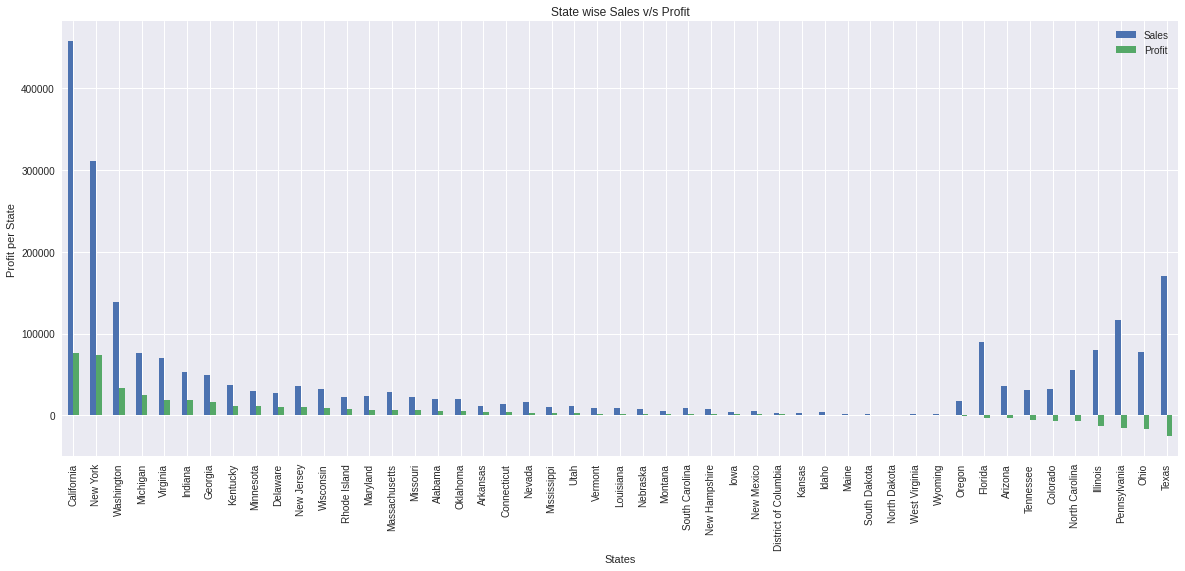

In [157]:
# State wise Sales v/s Profit

state_data= data.groupby(['State'])[['Sales', 'Profit']].sum()
state_data.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.title('State wise Sales v/s Profit')
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

From the above graph, it can be observed that there are certain cities for which the sales is positive but the profits are negative. This may be due to the higher discounts being given in order to drive the sales but in vain. 

In [158]:
# computing the most important categories in terms of sales from first 100 observations
feature_1 = dataset.groupby("Category").Sales.sum().nlargest(n=5000)
# computing the most important categories in terms of profit from first 100 observations
feature_2 = dataset.groupby("Category").Profit.sum().nlargest(n=5000)
print("Categories in terms of sales: ",feature_1)
print("Categories in terms of profit: ",feature_2)

Categories in terms of sales:  Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64
Categories in terms of profit:  Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64


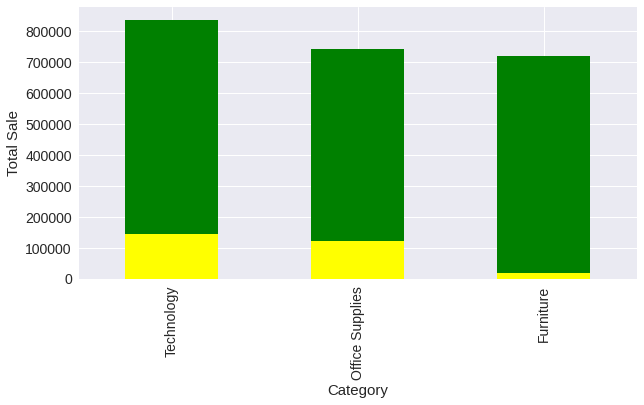

In [159]:
plt.style.use('seaborn')
feature_1.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='green')
feature_2.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='yellow')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sale',fontsize = 15)
plt.show()

The overall sales has been higher for technology and lower almsot similar for office supplies as well as furniture.

In comparison, the profits for furniture has been the lowest and for technology has been the highest.

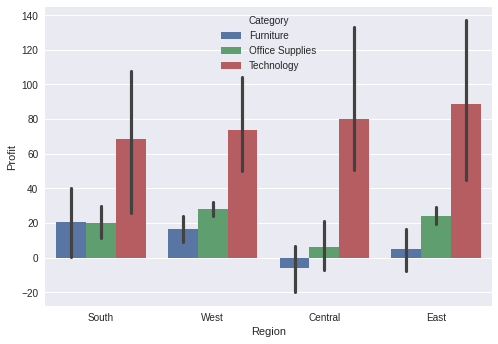

In [160]:
sns.barplot(x=dataset.Region, y=dataset.Profit,hue=dataset.Category)

The Central USA seems to be the main cause for loss in the category of furniture.

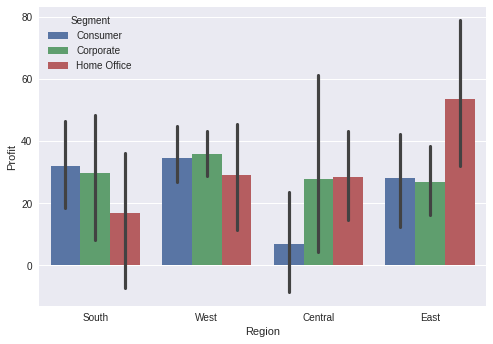

In [161]:
sns.barplot(x=dataset.Region, y=dataset.Profit,hue=dataset.Segment)

In [162]:
# computing the most important categories in terms of sales from first 100 observations
feature_1 = dataset.groupby("Sub-Category").Sales.sum().nlargest(n=5000)
# computing the most important categories in terms of profit from first 100 observations
feature_2 = dataset.groupby("Sub-Category").Profit.sum().nlargest(n=5000)
print(feature_1)
print(feature_2)

Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91683.0240
Paper           78224.1420
Supplies        46673.5380
Art             27107.0320
Envelopes       16476.4020
Labels          12444.9120
Fasteners        3024.2800
Name: Sales, dtype: float64
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Chairs         26567.1278
Storage        21278.8264
Appliances     18138.0054
Furnishings    13052.7230
Envelopes       6964.1767
Art             6524.6118
Labels          5526.3820
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


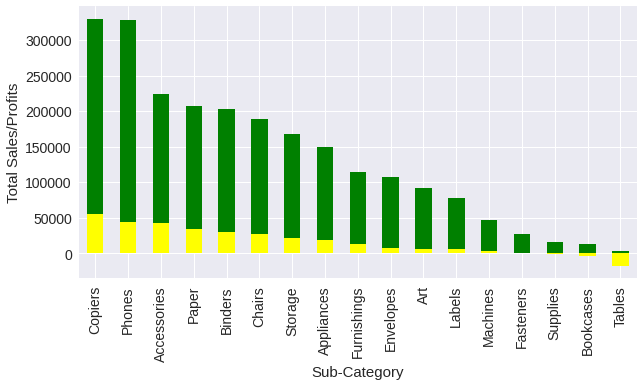

In [163]:
# total sales/profits for each sub=category

plt.style.use('seaborn')
feature_1.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='green')
feature_2.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='yellow')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.show()

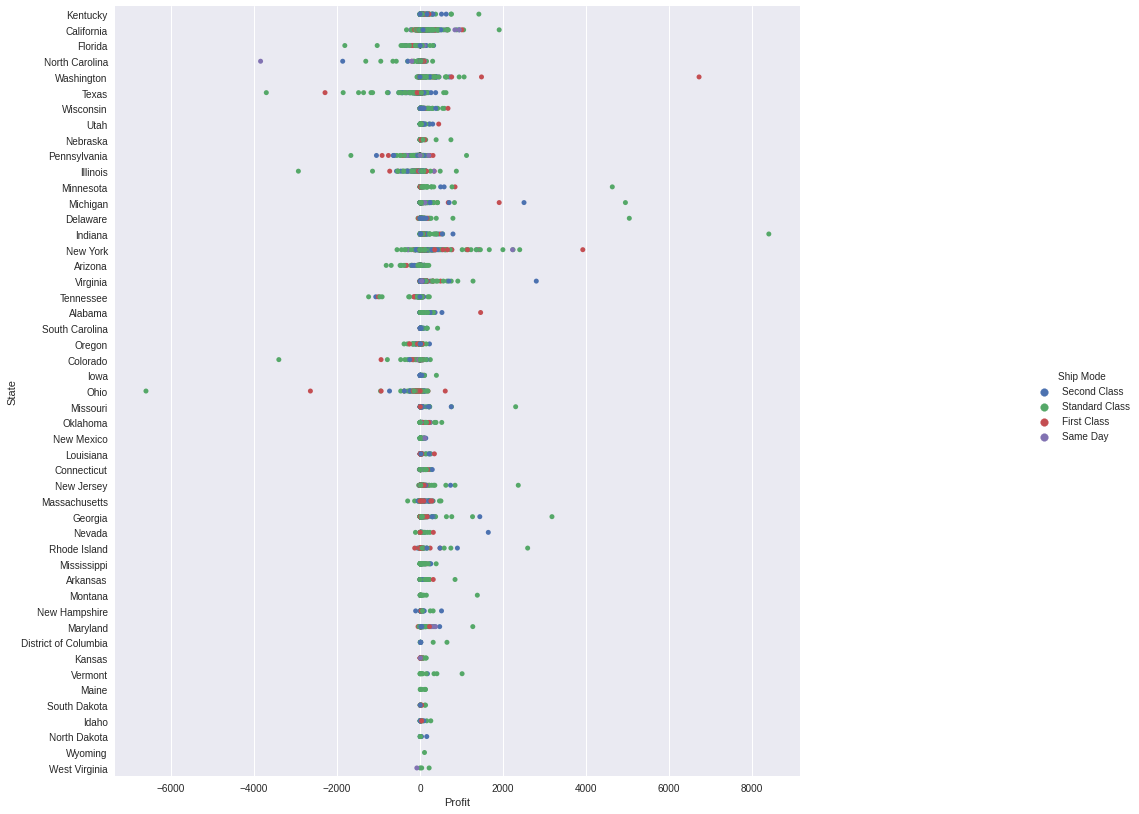

In [164]:
# state-wise profit for each category of ship mode

g=sns.catplot(x="Profit", y="State", hue='Ship Mode',jitter=False, data=dataset,legend='True')
g.fig.set_size_inches(20,12)

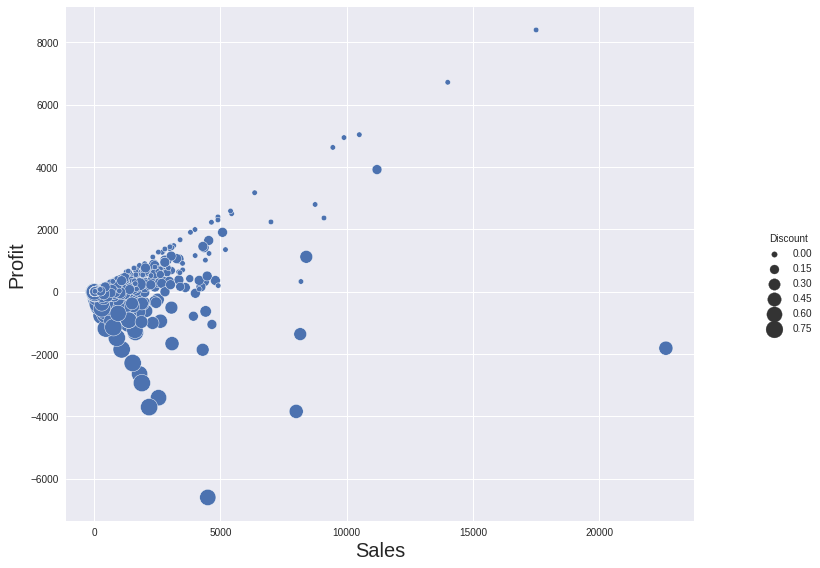

In [165]:
# effect of discount on sales and profit

g=sns.relplot(x="Sales", y="Profit", size="Discount", sizes=(30, 300),ax=ax, data=dataset)
plt.xlabel("Sales", size=20)
plt.ylabel("Profit", size=20)
g.fig.set_size_inches(12,8)

This relationship is much obvious. It shows that as the sales increases, the profit decreases for an increase in discount. 

The clustered area shows that for a sales range between 0 and 2500, the profit is slight negative for a discount range of 0.45 to 0.75 and is slight positive for a discount range of 0 to 0.45

This points towards the conclusion that a discount of more than 0.45 will almost always lead to losses.

## **As a business manager, try to find out the weak areas where you can work to make more profit.**



*   In ship mode, the maximum profit is made from the 'First Class' mode.
Standard Class is the most heavily used ship mode which gives us a lower profit as compared to the 'First Class'.

* The most used part in the segment is the consumer segment though the highest profit is generatde from the home-office segment.

* The Western region and subsequently the eastern region are the two regions that provide us higher profitability. Central produces a very low profitability.

* The office supplies are oredred the most though the maximum profit is from the technology sector.

* The maximum used sub-category is paper though copiers provide a higher profit.

* There are certain states providing negative profits owing to very low sales (no discounts have been provided).

* If the range of discount lies from 0.3 to 0.5, the sales incresaes but the profits become negative.
The preferable discount is approximately less than 0.4

* The states in the Central region are the loss-making regions. So, supply to those regions must be stopped since sales is also not there inspute oif the discounts providede. 
Infact, the discounts being provided is leading to losses.

* Increase the supply of technology with negligible discounts mainly in the eastern, western and central region.

* The ship mode 'Second Class' to be used in all the regions with negligible discounts or a maximum discount of 0.2
The ship mode 'First Class' in the easter, central and western regions with a maximum discount of 0.32

* More supply of consumer segment in all the regions with preferably no discounts or a discount of 0.35 at max.
More supply of home-office segment in the eastern and central regions with a maximum discount of 0.32

* Increasing the office supply in the eastern and western regions at a discount of 0.2 or less.

* As seen in the last graph, a discount of more than 0.45 overall, in any of the items, categories, or region is going to bring extreme losses. So, this needs to be avoided.




# **What all business problems you can derive by exploring the data?**

* More supply of technology as compared to the furnture items.

* Not allowing for a discount of more than 0.45

* Tables and blockcases provide negative profit. Apply marketing strategies to explore the profitable regions and hence the corresponding discounts.

* Many states like Vermont, Luisiana, Montana have higher profit margins but due to lower sales, the overall profitability is low. Marketing strategies can be applied.

* Standard Class is the most heavily used ship mode which gives us a lower profit as compared to the 'First Class'. So, shipping mode of standrd class can be done for easter, central, and western regions for profitability.

* More supply of home-office segment in the eastern and central regions with a maximum discount of 0.32

------------------

# **Thank You!**